In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

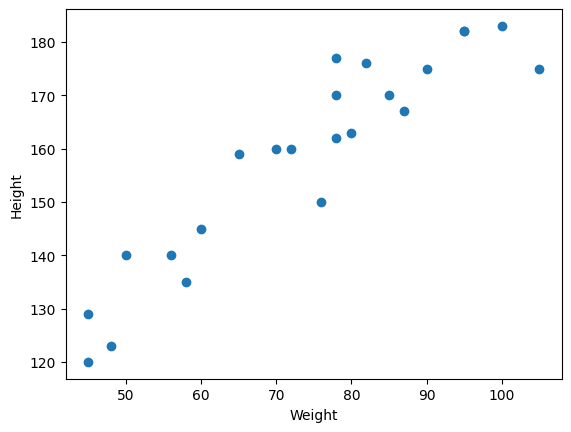

In [5]:
###Scatter plot 
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [6]:
##Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


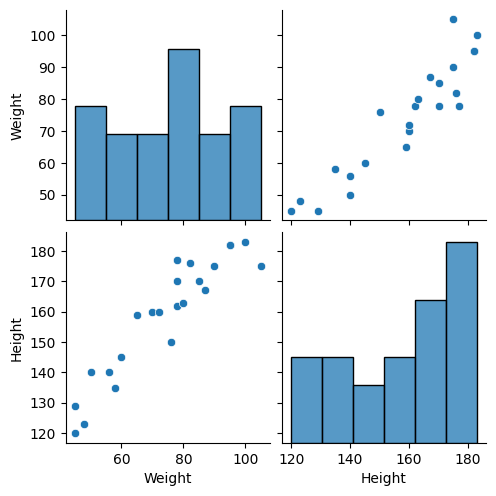

In [8]:
### Seaborn for Visualation
# same correlation can be visualize using seaborn library
import seaborn as sns
sns.pairplot(df)

In [14]:
## Independent and Dependent Features
X=df['Weight']
type(X) # Series 
np.array(X).shape

(23,)

In [15]:
X_series=df[['Weight']] # Independent feature should be dataframe or 2D array
type(X)# DataFrame
np.array(X).shape

(23, 1)

In [16]:
# dependent feature can be in series or 1D array
Y=df['Height']
np.array(Y).shape


(23,)

In [17]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
# random state
# In the train_test_split function, random_state=42 ensures that 
# the same train and test sets are produced each time the code is run


In [18]:
X_train.shape

(17, 1)

In [20]:
## Standardization
# Consider two features X and y in kg and cm both have different units 
# then higher unit will take more time to come to gradient descent
# hence they are converted into mean and variance using  z score 

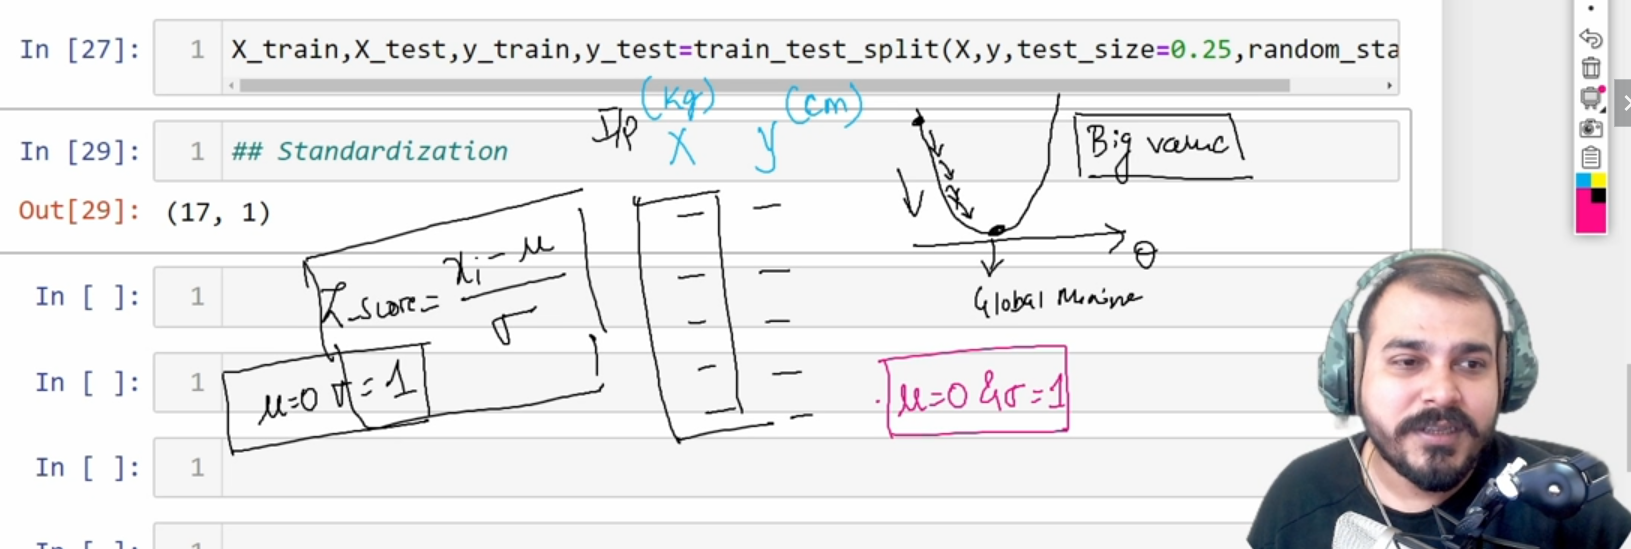

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

![StandardScalar](StandardScalar.png)

In [ ]:
# why we dont use fit transform with test dataset 
# Data Leakage :- if we dont apply fit transform to test dataset because 
# we dont want our training data to know anything about test dataset 

In [24]:
X_test=scaler.transform(X_test)

In [25]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [30]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1) 


In [31]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [33]:
print("Coefficient or slope",regression.coef_)
print("Intercept",regression.intercept_)

Coefficient or slope [17.2982057]
Intercept 156.47058823529412


![RegressionCoeff](RegressionCoeff.png)

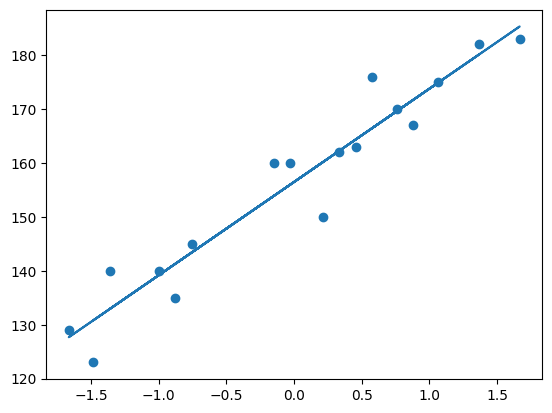

In [35]:
##Plot Training data plot best fit 
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [36]:
#Prediction for test data
# 1.predicted height output=intercept+coef_(Weights)
# 2.Y_pred_test=156.470 +17.29(X_test)

In [38]:
## Prediction for test Data
y_pred=regression.predict(X_test)

In [39]:
##Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [40]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605
